CARLOS MANUEL ALVARADO 20200118
- respuestas al final del tutorila

# Contours Tutorial

## Summary
- Extract contours
- Draw contours
- Contour features

## Extract contours

In [1]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

path = '/Users/carlosalvarado/Desktop/ComputerVision/fotos/'

im = cv.imread(path+'leaf.png')

assert im is not None, "file could not be read, check with os.path.exists()"

imgray = cv.cvtColor(im, cv.COLOR_BGR2GRAY)
print(imgray.shape)
# fixed Th
ret, imgbin = cv.threshold(imgray, 120, 255, cv.THRESH_BINARY)


(217, 288)


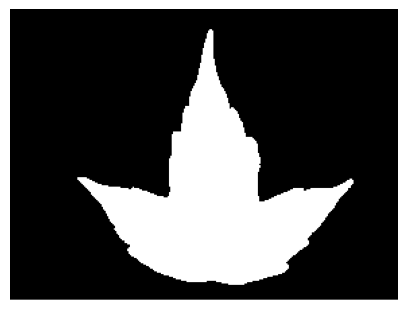

In [2]:
def view(img, title=None):
    k = 5
    fig,ax1 = plt.subplots(figsize=(k,k))
    if len(img.shape)==2:
        ax1.imshow(img, vmin=0, vmax=255, cmap='gray')
    else:
        ax1.imshow(img)
    if title:
        plt.title(title)   
    plt.axis('off')
    plt.show()
view(imgbin)

In [3]:
# compute contours
mode = cv.RETR_TREE # contour retrieval mode
method = [cv.CHAIN_APPROX_NONE, cv.CHAIN_APPROX_SIMPLE] # contour approximation method 
contours, hierarchy = cv.findContours(imgbin, mode, method[1])

In [4]:
print(f'Type: {type(contours)}')
print(f'Elements: {len(contours):,}')
contours

Type: <class 'tuple'>
Elements: 2


(array([[[  0, 216]],
 
        [[287, 216]]], dtype=int32),
 array([[[148,  15]],
 
        [[147,  16]],
 
        [[147,  17]],
 
        [[146,  18]],
 
        [[146,  21]],
 
        [[145,  22]],
 
        [[145,  24]],
 
        [[144,  25]],
 
        [[144,  28]],
 
        [[143,  29]],
 
        [[143,  33]],
 
        [[142,  34]],
 
        [[142,  39]],
 
        [[141,  40]],
 
        [[141,  43]],
 
        [[140,  44]],
 
        [[140,  48]],
 
        [[139,  49]],
 
        [[139,  52]],
 
        [[138,  53]],
 
        [[138,  54]],
 
        [[137,  55]],
 
        [[137,  56]],
 
        [[136,  57]],
 
        [[136,  58]],
 
        [[135,  59]],
 
        [[135,  60]],
 
        [[134,  61]],
 
        [[134,  64]],
 
        [[133,  65]],
 
        [[133,  71]],
 
        [[132,  72]],
 
        [[130,  72]],
 
        [[130,  73]],
 
        [[129,  74]],
 
        [[129,  76]],
 
        [[128,  77]],
 
        [[128,  84]],
 
        [[127,  85]],
 
   

## Drawing Contours

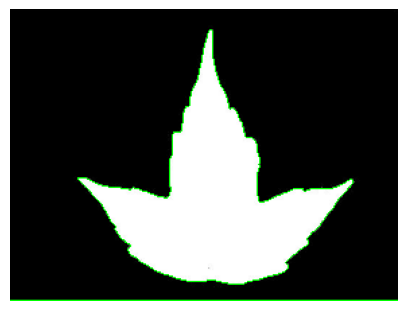

In [5]:
# draw contours over image
index = -1
color = (0,255,0) #(r,g,b)
thickness = 1
imgcont = cv.drawContours(im.copy(), contours, index, color, thickness)
view(imgcont)

## Contour Features

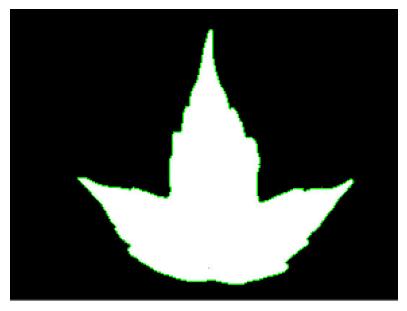

In [6]:
# draw contours over image
index = 1
color = (0,255,0) #(r,g,b)
thickness = 1
imgcont = cv.drawContours(im.copy(), contours, index, color, thickness)
view(imgcont)
cnt = contours[index]

In [7]:
M = cv.moments(cnt)
cx = int(M['m10']/M['m00'])
cy = int(M['m01']/M['m00'])
print(cx,cy)

151 142


# Area

In [8]:
contours_area = cv.contourArea(cnt)
print(contours_area)

13700.5


# Perimeter

In [9]:
perimeter = cv.arcLength(cnt,True) # second argument if the contour is a closed loop
print(perimeter)

746.6833273172379


# Contour approximation

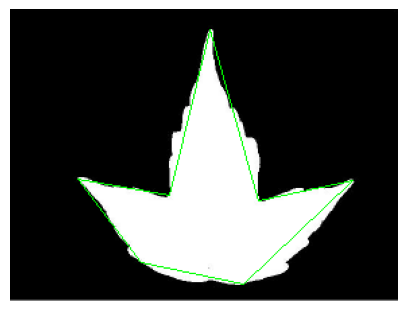

In [10]:
percent =0.02
epsilon = percent*cv.arcLength(cnt,True)
approx = cv.approxPolyDP(cnt,epsilon,True)
imgcont = cv.drawContours(im.copy(), [approx], -1, color, thickness)
view(imgcont)

# Convex Hull

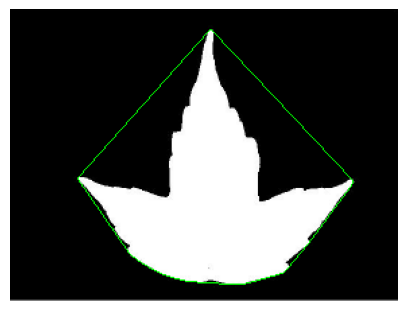

In [11]:
hull = cv.convexHull(cnt)
imgcont = cv.drawContours(im.copy(), [hull], -1, color, thickness)
view(imgcont)

# Bounding Rectangle

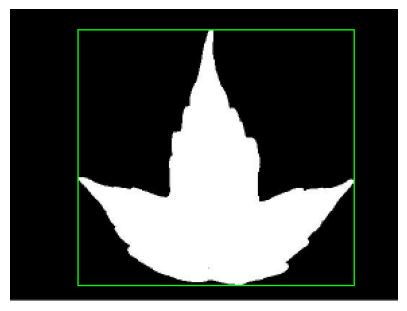

In [12]:
x,y,w,h = cv.boundingRect(cnt)
view(cv.rectangle(im.copy(),(x,y),(x+w,y+h),(0,255,0),1))

# Minimum area bounding rectangle

/var/folders/nc/msnr18q57_bfryvsdz5vb_w00000gn/T/ipykernel_82625/138213052.py:3: DeprecationWarning: `np.int0` is a deprecated alias for `np.intp`.  (Deprecated NumPy 1.24)
  box = np.int0(box)


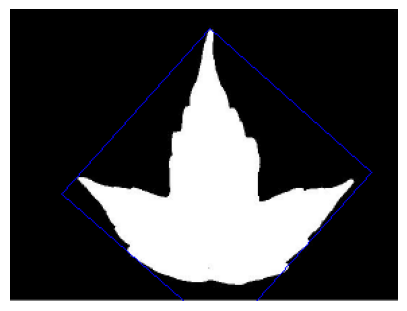

In [13]:
rect = cv.minAreaRect(cnt)
box = cv.boxPoints(rect)
box = np.int0(box)
view(cv.drawContours(im.copy(),[box],0,(0,0,255),1))

# Enclosing circle

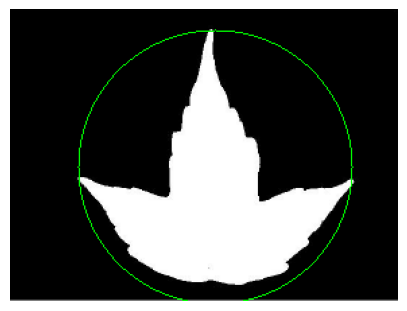

In [14]:
(x,y),radius = cv.minEnclosingCircle(cnt)
center = (int(x),int(y))
radius = int(radius)
view(cv.circle(im.copy(),center,radius,(0,255,0),1))

# Elipse
It returns the rotated rectangle in which the ellipse is inscribed.

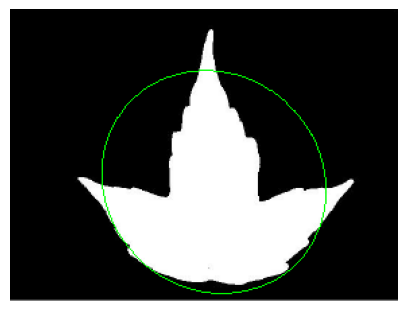

In [15]:
ellipse = cv.fitEllipse(cnt)
view(cv.ellipse(im.copy(),ellipse,(0,255,0),1))

# Aspect Ratio
It is the ratio of width to height of bounding rect of the object.

In [16]:
x,y,w,h = cv.boundingRect(cnt)
aspect_ratio = float(w)/h
aspect_ratio 

1.0789473684210527

# Extent
Extent is the ratio of contour area to bounding rectangle area.

In [17]:
area = cv.contourArea(cnt)
x,y,w,h = cv.boundingRect(cnt)
rect_area = w*h
extent = float(area)/rect_area
extent

0.35174582798459564

# Solidity
Solidity is the ratio of contour area to its convex hull area.

In [18]:
area = cv.contourArea(cnt)
hull = cv.convexHull(cnt)
hull_area = cv.contourArea(hull)
solidity = float(area)/hull_area
solidity

0.6033070588753358

# Extreme points

In [19]:
leftmost = tuple(cnt[cnt[:,:,0].argmin()][0])
rightmost = tuple(cnt[cnt[:,:,0].argmax()][0])
topmost = tuple(cnt[cnt[:,:,1].argmin()][0])
bottommost = tuple(cnt[cnt[:,:,1].argmax()][0])

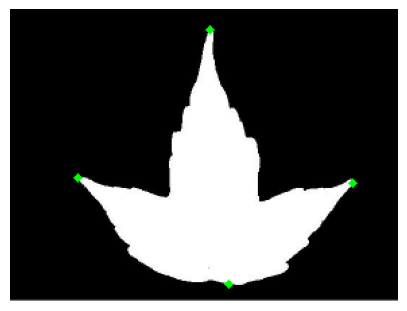

In [20]:
r = im.copy()
for p in [leftmost,rightmost,topmost,bottommost]:
    r = cv.circle(r, p, radius=1, color=(0, 255, 0), thickness=4)
view(r)

# Compare contours

In [21]:
im = cv.imread(path+'rice.png')
imgray = cv.cvtColor(im, cv.COLOR_BGR2GRAY)
print(imgray.shape)
# adaptive Th
imgbin = cv.adaptiveThreshold(imgray, 255,cv.ADAPTIVE_THRESH_GAUSSIAN_C, cv.THRESH_BINARY,127,5)

# compute contours
mode = cv.RETR_TREE # contour retrieval mode
method = [cv.CHAIN_APPROX_NONE, cv.CHAIN_APPROX_SIMPLE] # contour approximation method 
contours, hierarchy = cv.findContours(imgbin, mode, method[1])

(256, 256)


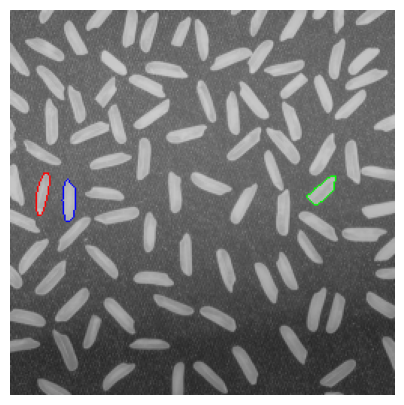

In [22]:
# draw contours over image

index =  606
color = (0,255,0) #(r,g,b)
thickness = 1
r = im.copy()
colors = {606:(255,0,0),602:(0,255,0),600:(0,0,255)}
selected_c = [606, 602,600]
for c in selected_c:
    r = cv.drawContours(r, contours, c, colors[c], thickness)
view(r)

In [23]:
contorno = []
for c in contours:
    if (cv.contourArea(c)>10):
        
        contorno.append(c)
len(contorno)

93

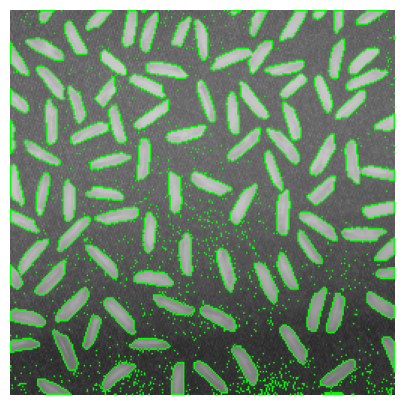

In [24]:
# alternate method for drawing contours
cnts = [contours[c] for c in range(1,788)]
view(cv.drawContours(im.copy(), cnts, -1, color, 1))

# Compare contour similarity
Lower is more similar

In [25]:
ret = cv.matchShapes(contours[600],contours[603],1,0.0)
print(ret)

1.7976931348623157e+308


Preguntas
1. cuantos granos de arroz estimo que hay 
2. cuales son los granos más similares
3. cual es la ortientación de cada arroz

Pregunta No. 1

In [35]:
contorno = []

for c in contours:
    # limitar el contorno, para tener un área más ajustada. 
    percent =0.052
    epsilon = percent*cv.arcLength(c,True)
    approx = cv.approxPolyDP(c,epsilon,True)
    if (cv.contourArea(approx)>50): #pongo el mínimo del área
        contorno.append(c)
len(contorno)

88

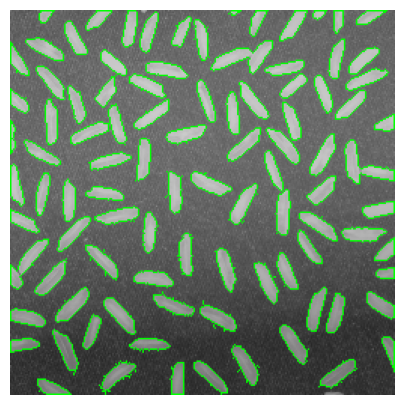

In [27]:
view(cv.drawContours(im.copy(), contorno, -1, color, 1))

Pregunta No. 2

In [28]:
import itertools

In [29]:
nums = contorno
r = 2
combinations = list(itertools.combinations(nums, r))
#print(combinations)

In [30]:
len(combinations)

4186

In [31]:
menor = 100000000
el_par = []
for par in combinations:
    ret = cv.matchShapes(par[0],par[1],1,0.0)
    if(menor > ret):
        menor = ret
        el_par = par

#print(f"El ret menor es: {menor}, y el par es: {el_par}")

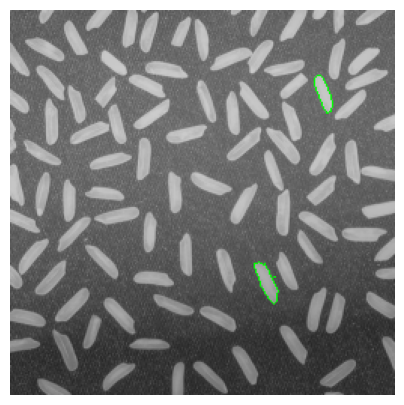

In [32]:
view(cv.drawContours(im.copy(), el_par, -1, color, 1))

Pregunta No. 3

In [33]:
import math
import pandas as pd

In [53]:
contornos_data = {}
angulos = {}
indexes = []
thickness = 1
#(255,0,0),602:(0,255,0)
for cnt in range(len(contorno)):
    ellipse_contorno = cv.fitEllipse(contorno[cnt])
    #print(f"{ellipse_contorno[2]}, grados en el contorno: {cnt}")
    contornos_data.update({cnt:contorno[cnt]})
    if (ellipse_contorno[2] > 90):
        val =  (180 - (ellipse_contorno[2]) + 90)
        angulos.update({f"contorno: {cnt}": [val,]})
    else:
        val = (90 - ellipse_contorno[2])
        angulos.update({f"contorno: {cnt}": [val,]})
contornos_angulos = pd.DataFrame(angulos)

In [54]:
contornos_angulos = contornos_angulos.transpose()
contornos_angulos = contornos_angulos.rename(columns={0: 'Angulo'})
contornos_angulos

,Angulo
contorno: 0,151.413689
contorno: 1,85.974111
contorno: 2,135.887894
contorno: 3,39.598785
contorno: 4,36.006336
...,...
contorno: 83,83.815055
contorno: 84,56.370819
contorno: 85,66.772732
contorno: 86,80.285158


In [70]:
arroz = int(input("Ingrese el contorno que desea ver: "))

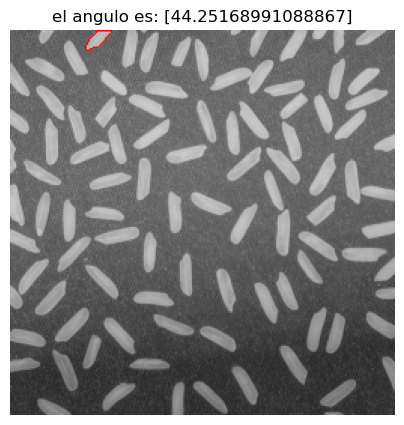

In [71]:
r = im.copy()
colores = (255,0,0)
r = cv.drawContours(r, contorno, arroz, colores, thickness)
ang = angulos[f"contorno: {arroz}"]
view(r, f"el angulo es: {ang}")